# Cement strength 
## Description

Data set of 1030 concrete curing samples with recorded data such as cement quantity, furnace slag, quantity of aggregate, and age. 

The column attributes are as follows:

| Id | Attribute |Domain |
| -   | ----------- |----------- |
| 1   | cement | kg in a m3  |
| 2   | blast furnace slag   | kg in a m3 |
| 3   | fly ash | kg in a m3 | 
| 4   |water | kg in a m3 |
| 5   | superplasticizer | kg in a m3 |
| 6   | coarse aggregate| kg in a m3 |
| 7   | fine aggregate   |kg in a m3 |
| 8   |  age| 1-356 |
| 9   |compressive strength| MPa |


## Importing the Dataset

In [43]:
import numpy as np
import pandas as pd

headers = ["cement","slag","ash","water","superplasticizer","coarse","fine","age","strength"]
concrete_data = pd.read_excel("../../datasets/regression/concrete-data", names = headers)

## Preparing the Dataset

The following block prints the shape and column datatypes of the processed dataset.

In [44]:
print(concrete_data.shape)
print(concrete_data.dtypes)

(1030, 9)
cement              float64
slag                float64
ash                 float64
water               float64
superplasticizer    float64
coarse              float64
fine                float64
age                   int64
strength            float64
dtype: object


## Preprocessing the Dataset

In [45]:
from sklearn.model_selection import train_test_split

X = (concrete_data.iloc[:,:concrete_data.shape[1]-1]).to_numpy()
y = concrete_data.iloc[:,concrete_data.shape[1]-1:concrete_data.shape[1]].to_numpy().flatten()

# Split the data set into a 60:20:20 (train:test:val) ratio
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.80, test_size = 0.20, random_state=0)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, train_size=0.75, test_size = 0.25, random_state=0)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit scaler to data then transform it.
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation to test and validation data without fitting.
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

## Training on Multiple Regressors

In [47]:
#Manage imports 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from utilities import train_estimators, plot_estimator_scores

## Training on Multiple Regressors

### Linear Regression

In [50]:
LinearRegressionEstimators = LinearRegression().fit(X_scaled, y)
LR_train_score = LinearRegressionEstimators.score(X_train_scaled, y_train)
LR_test_score = LinearRegressionEstimators.score(X_test_scaled, y_test)
LR_val_score = LinearRegressionEstimators.score(X_val_scaled, y_val)
LR_scores = [LR_train_score,LR_test_score,LR_val_score]
print(LR_scores)

[0.5964508249244472, 0.6445297402800307, 0.6371908587805633]


### SVM Regression

Training SVR(C=0.01, gamma=0.0001, max_iter=10000)...
Training SVR(C=0.1, gamma=0.0001, max_iter=10000)...
Training SVR(C=1.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=10.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=100.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=1000.0, gamma=0.0001, max_iter=10000)...


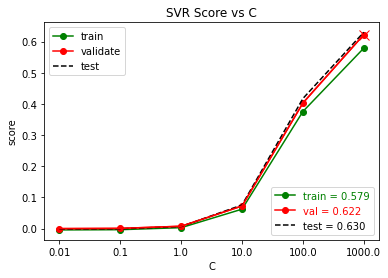

In [55]:
adjusted_parameter = 'C'
adjusted_parameter_values = [0.01, 0.1,1.0,10.0,100.0,1000.0]

SVMEstimators = train_estimators(X_train_scaled, y_train,
                                    SVR,
                                    adjusted_parameter, adjusted_parameter_values,
                                    gamma=0.0001,
                                    max_iter=10000)
plot_estimator_scores(SVMEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

## Decision Tree Regression

Training DecisionTreeRegressor(max_depth=1, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=5, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=10, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=20, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=50, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=100, splitter='random', random_state=0)...


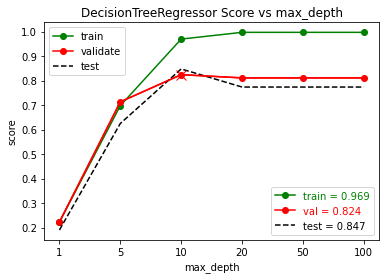

In [57]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

DecisionTreeEstimators = train_estimators(X_train_scaled, y_train,
                                            DecisionTreeRegressor,
                                            adjusted_parameter, adjusted_parameter_values,
                                            splitter='random',
                                            random_state=0)
plot_estimator_scores(DecisionTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

## RandomForest Regressor

Training RandomForestRegressor(max_depth=1, random_state=0)...
Training RandomForestRegressor(max_depth=5, random_state=0)...
Training RandomForestRegressor(max_depth=10, random_state=0)...
Training RandomForestRegressor(max_depth=20, random_state=0)...
Training RandomForestRegressor(max_depth=50, random_state=0)...
Training RandomForestRegressor(max_depth=100, random_state=0)...


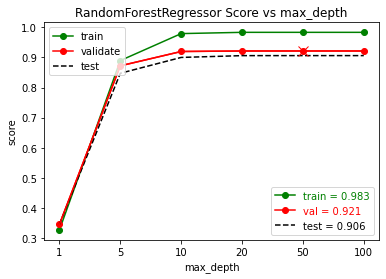

In [59]:


adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

RandomTreeEstimators = train_estimators(X_train_scaled, y_train,
                                        RandomForestRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(RandomTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)



## K-nearest Regressor

Training KNeighborsRegressor(weights=uniform, n_neighbors=2)...
Training KNeighborsRegressor(weights=distance, n_neighbors=2)...


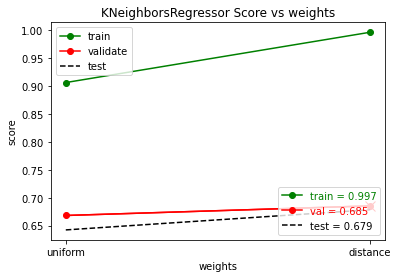

In [60]:
adjusted_parameter = 'weights'
adjusted_parameter_values = ['uniform','distance']

KNearestEstimators = train_estimators(X_train_scaled, y_train,
                                        KNeighborsRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

Training KNeighborsRegressor(algorithm=auto, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=ball_tree, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=kd_tree, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=brute, n_neighbors=2)...


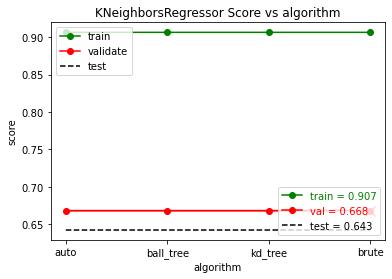

In [61]:
adjusted_parameter = 'algorithm'
adjusted_parameter_values = ['auto', 'ball_tree', 'kd_tree','brute']

KNearestEstimators = train_estimators(X_train_scaled, y_train,
                                        KNeighborsRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

## Ada Boost Regression

Training AdaBoostRegressor(n_estimators=10, random_state=0)...
Training AdaBoostRegressor(n_estimators=50, random_state=0)...
Training AdaBoostRegressor(n_estimators=100, random_state=0)...
Training AdaBoostRegressor(n_estimators=500, random_state=0)...
Training AdaBoostRegressor(n_estimators=1000, random_state=0)...
Training AdaBoostRegressor(n_estimators=5000, random_state=0)...


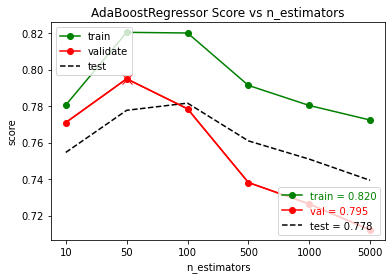

In [66]:
adjusted_parameter = 'n_estimators'
adjusted_parameter_values = [10, 50, 100, 500, 1000, 5000]

AdaBoostEstimators = train_estimators(X_train_scaled, y_train,
                                        AdaBoostRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(AdaBoostEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

## Gaussian Process Regressor

In [18]:
clf = GaussianProcessRegressor()
NaiveBayesRegressor=clf.fit(X_train, y_train)
NB_test_scores =  NaiveBayesRegressor.score(X_test, y_test)
NB_val_scores =  NaiveBayesRegressor.score(X_val, y_val)
print(NB_val_scores,NB_test_scores)

-6.581174205668172 -8.539318876601744
